In [195]:
# Jimmy 5.29
"""
Work FLow
1. Decriptive Statistics
2. Data Processing & Feature Engineering
3. Data Analysis & Visualization
"""

import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# load data
data = pd.read_csv('pokemon.csv')
pd.set_option('display.max_rows', data.shape[0])
pd.set_option('display.max_columns', data.shape[1])
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


# 1. Descriptive Statistics & Data Cleaning

In [196]:
# pokemon dataset has 801 rows and 41 columns
data.shape

(801, 41)

In [197]:
# random sample 5 rows for more detail infomatoin and we can better understand the data
data.sample(5).T

,662,489,205,739,301
abilities,"['Flame Body', 'Gale Wings']",['Hydration'],"['Serene Grace', 'Run Away', 'Rattled']","['Hyper Cutter', 'Iron Fist', 'Anger Point']","['Keen Eye', 'Stall', 'Prankster']"
against_bug,0.25,1.0,1.0,0.5,1.0
against_dark,1.0,1.0,1.0,0.5,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,2.0,2.0,1.0,1.0,1.0
against_fairy,0.5,1.0,1.0,2.0,2.0
against_fight,0.5,1.0,2.0,2.0,0.0
against_fire,0.5,0.5,1.0,2.0,1.0
against_flying,1.0,1.0,1.0,2.0,1.0
against_ghost,1.0,1.0,0.0,1.0,1.0


From the random sample of data and from the last 5 rows of the dataset that we extracted, we can see that there are some NaN values in columns "type2". And also that we got float type, integer type, and string type values in our dataset.

In [198]:
# check for Null or NaN values in the dataset
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [199]:
# Replace the NaN values for easier analysis
data['type2'].fillna('None', inplace=True) # Replacing the values in type2 with None
data['percentage_male'].fillna('None', inplace=True) # Replacing the values in percentage_male with None
data['height_m'].fillna(data['height_m'].mean(), inplace=True) # Replacing the values in height_m with Mode value of the whole column
data['weight_kg'].fillna(data['weight_kg'].mean(), inplace=True) # Replacing the values in weight_kg with mode value of the whole column

In [200]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [201]:
# check how many unique elements they contain
for i in ['generation','type1','type2']:
    print("{} contains: {}".format(i,data[i].unique()))

generation contains: [1 2 3 4 5 6 7]
type1 contains: ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']
type2 contains: ['poison' 'None' 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


In [202]:
# move the name to the first column for  easier identify the pokemon
data.insert(0, 'name', data.pop('name'))
data.isnull().sum()

name                 0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

One problem that can be identified in data.info() was that it has 7 object type columns, but on checking the data we can see that all the values we get from the functions data.sample(), head() and tail() is that, the column "capture_rate" has all numeric values but still it is counted in object type.

In [204]:
for i in data.capture_rate:
    print(i,end=", ")

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

The value of one particular Pokemon has 2 capture rates (i.e. 30 (Meteorite) 255 (Core)). We will replace it with one single value and then we are good to convert this column into integer type.

In [205]:
data[data["capture_rate"]== "30 (Meteorite)255 (Core)"][['name','capture_rate','type1','generation','classfication']]

,name,capture_rate,type1,generation,classfication
773,Minior,30 (Meteorite)255 (Core),rock,7,Meteor Pokémon


In [206]:
data["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
data['capture_rate'] = data['capture_rate'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

Then we will remove some unneeded colunms and add few some needed

In [207]:
# Removing japanese_name, pokedex_number, and percentage_male
data.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True)

# adding total abilities that a pokemon has
data['total_abilities'] = data.apply(lambda x: len(x["abilities"]), axis=1)

In [208]:
# merging type1 and type2 into one column => type
# renaming type1 => primary_type, type2 => secondary_type
data['type'] = data.apply(lambda x: x['type1'] if x['type2'] == 'None' else f'{x["type1"]}_{x["type2"]}', axis=1)

data.rename(columns={"type1": "primary_type", "type2": "secondary_type"}, inplace=True)

data.sample(5).T

,617,474,740,721,392
name,Stunfisk,Gallade,Oricorio,Rowlet,Piplup
abilities,"['Static', 'Limber', 'Sand Veil']","['Steadfast', 'Justified']",['Dancer'],"['Overgrow', 'Long Reach']","['Torrent', 'Defiant']"
against_bug,1.0,1.0,0.25,1.0,1.0
against_dark,1.0,1.0,1.0,1.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,0.0,1.0,2.0,1.0,2.0
against_fairy,1.0,2.0,0.5,1.0,1.0
against_fight,1.0,0.5,0.5,0.5,1.0
against_fire,1.0,1.0,0.5,2.0,0.5
against_flying,0.5,2.0,1.0,2.0,1.0


# 2. Data Analysis & Visualization

(1) Correlation between each attributes

In [209]:
data.corr()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,total_abilities
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,-0.186841,0.148176,0.215589,0.354255,-0.463272,-0.210522,0.055504,-0.254732,-0.054175,0.062133,0.009994,-0.012398,0.005230,-0.036474,0.035717,-0.059781,0.034897,0.055352,-0.002342,-0.043802,-0.031344,-0.001549,0.027864,-0.009296
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,-0.007660,-0.010763,-0.413632,-0.236919,-0.230415,0.011963,-0.119758,-0.001976,-0.098849,0.187220,0.024155,0.065446,-0.047674,0.048039,-0.008391,0.018608,0.010589,0.170849,0.132507,-0.000326,0.037634,-0.016013,0.136315,-0.133164
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,-0.120042,0.350048,0.142035,-0.210199,0.100153,0.090184,-0.227697,-0.096549,0.138217,0.164773,-0.151915,0.069766,-0.091317,-0.023794,0.172547,0.164448,0.089721,0.039739,-0.047416,0.078123,0.125991,-0.025201,0.014844,-0.065178
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,-0.269444,-0.328531,0.076699,-0.015769,-0.017592,0.417261,-0.187543,-0.297600,-0.104276,-0.061970,0.030411,-0.017137,-0.006815,-0.072433,-0.041584,0.003022,-0.035354,0.022305,0.019193,0.111422,-0.101403,-0.063180,-0.023151,-0.009941
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,-0.256504,0.273650,0.149488,0.146464,-0.145238,-0.205444,0.130323,-0.218937,0.207526,0.120594,-0.209323,0.098948,-0.091230,0.001655,0.146370,0.114993,0.129284,-0.010296,0.002754,0.065401,0.098210,0.150801,0.050165,-0.026883
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,0.358793,-0.220239,-0.006997,-0.189798,-0.264938,-0.240964,0.165066,0.205249,0.149123,-0.006359,-0.088722,0.048629,-0.040466,0.150424,0.010407,0.058524,0.109425,-0.118481,-0.044460,-0.050495,0.159761,0.000681,-0.059132,0.112843
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,-0.260766,0.186361,-0.055106,0.184334,-0.018519,0.120747,0.115992,-0.242635,-0.005762,-0.044802,0.007441,-0.061698,0.078668,0.037921,-0.027136,-0.085422,-0.099242,-0.088578,-0.019520,-0.079129,-0.043925,0.061157,-0.011073,-0.037781
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,-0.465010,0.277935,0.266780,0.484843,0.375023,0.161885,0.001264,-0.311997,-0.002991,-0.091304,0.056480,-0.106586,0.076299,-0.127950,0.019100,-0.072533,-0.060624,-0.111243,-0.079022,-0.043381,-0.125959,0.058204,-0.062214,-0.014460
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,0.093727,-0.052531,-0.404780,-0.105137,-0.084496,-0.061013,-0.002008,0.009046,-0.034549,0.174115,-0.037205,0.114179,-0.112219,0.136490,0.059262,0.031626,-0.062052,0.233309,0.195439,-0.029007,0.046506,0.038027,0.170746,-0.153541
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,0.195064,-0.239682,-0.127550,-0.221946,-0.093657,-0.375177,0.082812,0.229968,0.036787,-0.064971,0.063475,-0.017340,0.000511,0.139542,-0.039623,0.029533,0.056886,-0.093899,-0.056427,-0.153618,0.048407,-0.107987,-0.070826,0.163818


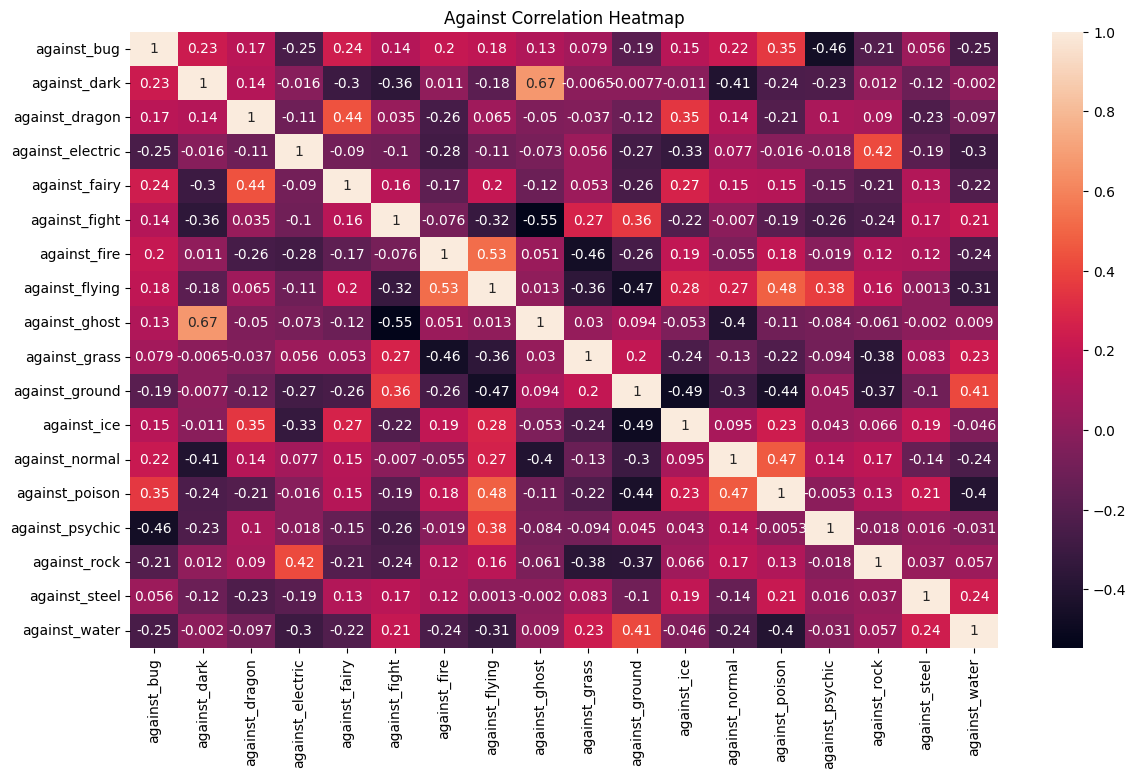

In [210]:
against = []
rest = []

for i in data.columns:
    if 'against' in i:
        against.append(i)
    else:
        rest.append(i)

fig,axes = plt.subplots(figsize=(14,8))
sns.heatmap(data[against].corr(),annot=True).set_title('Against Correlation Heatmap')
plt.show()

We can see that only against_dark has high correlation with against_ghost relativly(i.e. 0.67)

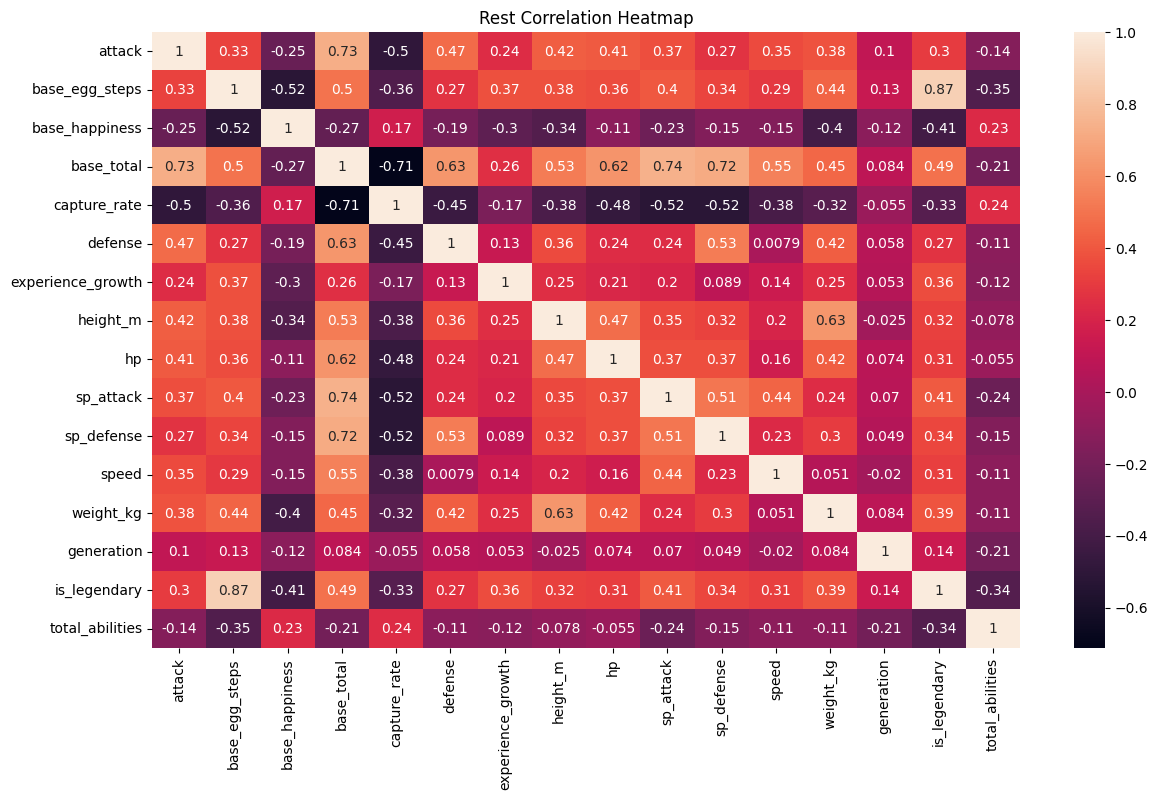

In [211]:
fig,axes = plt.subplots(figsize=(14,8))
sns.heatmap(data[rest].corr(),annot=True).set_title('Rest Correlation Heatmap')
plt.show()

We can see that:
    base_total has a good correlation with attack and defense attributes.
    
    base_total with:
        attack: 0.73
        sp.attack: 0.74
        defense: 0.63
        sp.defense: 0.72
    
    a pokemon being legendary has a good correlation with pokemon's egg steps: 0.87
    The weight of a pokemon has a good correlation with pokemon's height: 0.63

(2) How speed of pokemon releates to various base factors.

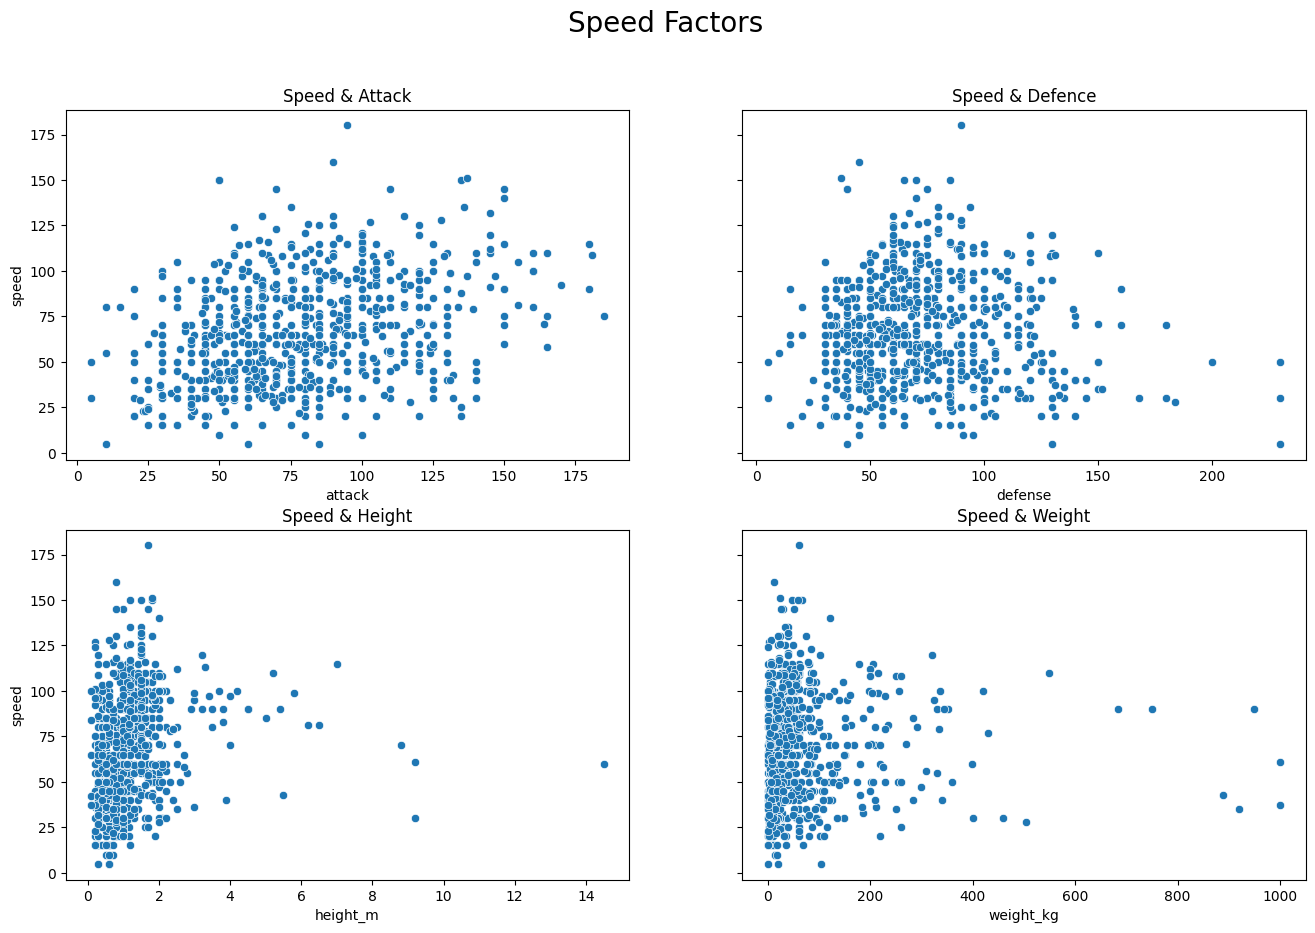

In [216]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x=data['attack'], y=data['speed'], ax=axes[0,0])
axes[0,0].set_title("Speed & Attack")
sns.scatterplot(x=data['defense'], y=data['speed'],ax=axes[0,1])
axes[0,1].set_title("Speed & Defence")
sns.scatterplot(x=data['height_m'], y=data['speed'],ax=axes[1,0])
axes[1,0].set_title("Speed & Height")
sns.scatterplot(x=data['weight_kg'], y=data['speed'],ax=axes[1,1])
axes[1,1].set_title("Speed & Weight")
fig.suptitle("Speed Factors", size=20)
plt.show()

Some insights that we can get from these graphs are:

    (1)A pokemon's speed  slightly depends on its attack and defense capacity, for example some pokemons have high attack while still keep moderate speed and pokemons have highest defense but not very slow.
    (2)Speed and weight affects speed a lot from above plots.

(2) What is the count of pokemons per generation?

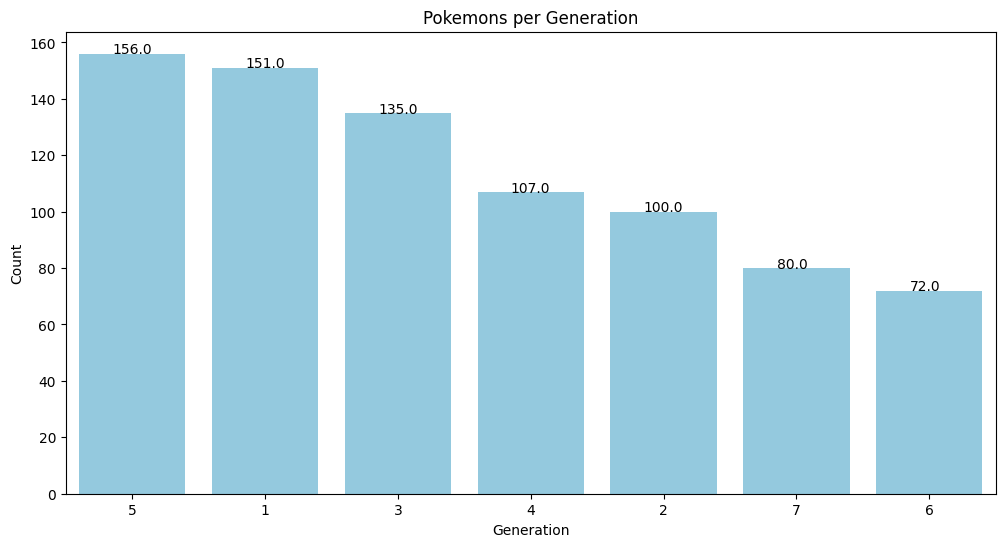

In [213]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=data,order=data['generation'].value_counts().index,color='skyblue')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

From above count plot we can figure out that most of the pokemons are from Gen-5, and least in Gen-6. Also, we can see that odd Generations have a larger number of pokemons than even number of generations.